In [1]:
# Example usage of DaqAsAwg with an existing DAQ object

from piec.drivers.daq.daq import Daq
from piec.drivers.emulators.daq_to_oscilloscope import DaqAsOscilloscope



In [2]:
from piec.drivers.autodetect import autodetect


In [3]:
daq = autodetect('daq')

Digilent: Connected to USB-231 on board 0.
USB231: Set to DIFFERENTIAL mode. Available Channels: [0, 1, 2, 3]


In [4]:
scope = DaqAsOscilloscope(daq)

Error initializing instrument at EMULATED_SCOPE: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.
Falling back to VIRTUAL mode.
INITIALIZING VIRTUAL RESOURCE MANAGER, VISA NOT CONNECTED


In [5]:
daq.set_input_mode("SE")

USB231: Set to SINGLE-ENDED mode. Available Channels: [0, 1, 2, 3, 4, 5, 6, 7]


In [5]:
scope.set_acquisition_channel(1)

In [21]:
scope.quick_read()

-0.53985595703125

In [18]:
scope.channel

[1]

In [14]:
import matplotlib.pyplot as plt
def test_manual():


    # 2. Wrap it with the Emulator
        
    # 3. Configure the Scope
    print("Configuring Scope...")
    scope.set_acquisition_channel(1)
    scope.set_input_coupling(0, 'DC')
    scope.set_vertical_scale(0, 2.0)  # 1 V/div
    scope.set_horizontal_scale(10e-4) # 10 ms/div -> 100ms Total
    
    # 4. Acquire Data
    print("Acquiring Waveform...")
    df = scope.get_data()
    
    if df.empty:
        print("No data received or channel off.")
        return

    print(f"Received {len(df)} points.")
    
    # 5. Plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time'], df['Channel 1'], label='Channel 1')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('DaqAsOscilloscope Test Capture')
    plt.grid(True)
    plt.legend()
    plt.show()

Configuring Scope...
Acquiring Waveform...
Received 500 points.


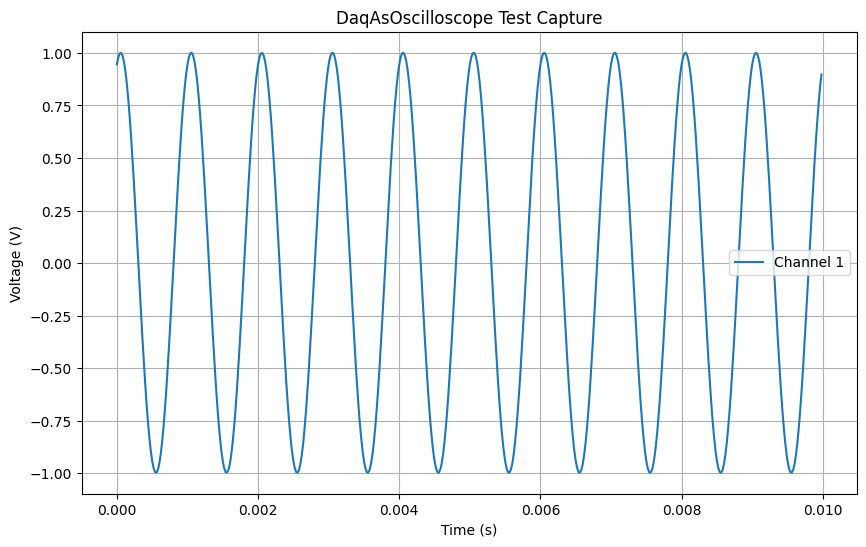

In [15]:
test_manual()

In [43]:
daq.read_AI(0)

-0.50048828125

In [4]:
awg.create_arb_waveform(1, 'meow', [0,0,0,1,1,1,0,0,0,1,1,1])

In [5]:
awg.set_frequency(1, 50)

In [6]:
awg.set_arb_waveform(1, 'meow')

In [9]:
awg.set_amplitude(1, 1)

Digilent: Started background scan on Ch 1


In [8]:
awg.output(1)

Digilent: Started background scan on Ch 1


In [4]:
awg.set_waveform(1, 'SIN')

In [8]:
daq.write_AO(1, 0)

In [ ]:
awg.set_waveform(1, 'SIN')
awg.set_frequency(1, 1000)      # 1 Hz (Software pacing is slow, so start low)
awg.set_amplitude(1, 5.0)   # 10 Volts Peak-to-Peak
awg.set_offset(1, 0.0)       # Centered at 0V
# 3. Start Generation
# This will calculate the points and start a software loop writing them to the DAQ
awg.output(1, True)

Digilent: Error starting scan: Error 24: Invalid sampling rate.
Hardware scan failed (fallback to software pacer): Error 24: Invalid sampling rate.


In [4]:
# Now defaults to device max rate (e.g. 5000 Hz)
# You can still change it, but keeping it <= max_rate is recommended
awg.set_waveform(1, 'NOIS')
awg.set_frequency(1, 50) # 10 Hz sine wave
awg.set_amplitude(1, 5) # 5V peak-to-peak
awg.output(1, True) # Should work immediately

Digilent: Started background scan on Ch 1


In [6]:
awg.output(1, False)